<H1>Guidance System for Retaliatory Violence in Rochester using Network Analysis </H1>
Advisor: Prof. Irshad Alteimer<br>
Team: Ritambhara Jha, Sreenidhi Sridhar, Carter Brazell

In [ ]:
#Mounting the google drive to get access to the dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import statements
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [ ]:
dataset = "/content/drive/Shareddrives/CPSI Capstone Group/Excel_sheets/Prediction_Dataset.xlsx"
df = pd.read_excel(dataset)

In [ ]:
#Top 10 Violent Features
x1 = df[['DegMedian','CloMedian','ClusCoeffMedian','Offense Differential','Proportion of Incidents that are Violent','Proxy Property Damage','Innocent Bystanders Hurt?','Shotspotter activation','Jail Intelligence','Uncooperative Witness']]
#Top 10 Total Features
x2 = df[['DegMedian','CloMedian','ClusCoeffMedian','Offense Differential','Proxies Attacked','Proxy Property Damage','Proxies Threatened','Innocent Bystanders Hurt?','Jail Intelligence','Uncooperative Witness']]
y1 = df[['Violent']]
y2 = df[['Total']]

In [ ]:
#Violent
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size = 0.20, random_state = 0)
#Total
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size = 0.20, random_state = 0)

In [ ]:
sc = StandardScaler()

xtrain1 = sc.fit_transform(xtrain1) 
xtest1 = sc.transform(xtest1)
xtrain2 = sc.fit_transform(xtrain2) 
xtest2 = sc.transform(xtest2)

In [ ]:
#SupportVectorRegressor Top 10
#Violent
regressor_V = SVR(C= 100, cache_size= 200, coef0= 0.0, degree= 3, epsilon= 0.1, gamma= 0.0001, kernel= 'rbf', max_iter= -1, shrinking= True, tol= 0.001, verbose= False) 
regressor_V.fit(xtrain1, ytrain1)
#Total
regressor_T = SVR(C= 1000, cache_size= 200, coef0= 0.0, degree= 3, epsilon= 0.1, gamma= 1, kernel= 'linear', max_iter= -1, shrinking= True, tol= 0.001, verbose= False) 
regressor_T.fit(xtrain2, ytrain2)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, gamma=1, kernel='linear')

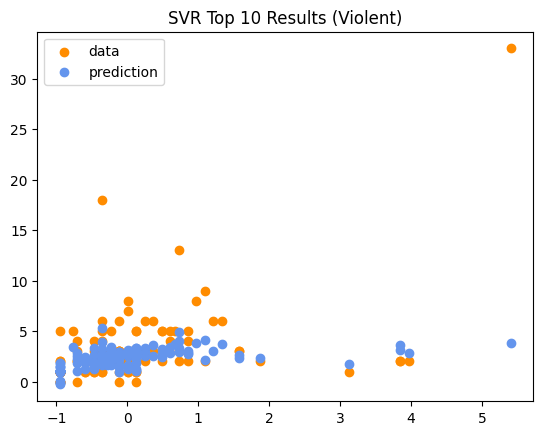

In [ ]:
#SupportVectorRegressor Top 10 Plot
#Violent
plt.scatter(xtrain1[:,0], ytrain1, color='darkorange', label='data')
plt.scatter(xtrain1[:,0], regressor_V.predict(xtrain1), color='cornflowerblue', label='prediction')
plt.title('SVR Top 10 Results (Violent)')
plt.legend()
plt.show()

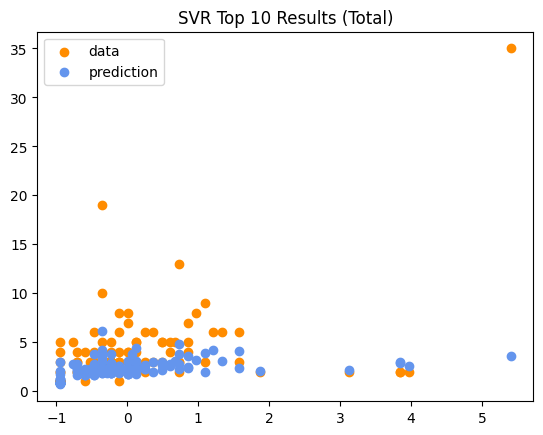

In [ ]:
#SupportVectorRegressor Top 10 Plot
#Total
plt.scatter(xtrain2[:,0], ytrain2, color='darkorange', label='data')
plt.scatter(xtrain2[:,0], regressor_V.predict(xtrain2), color='cornflowerblue', label='prediction')
plt.title('SVR Top 10 Results (Total)')
plt.legend()
plt.show()